## Executing MDF model for Logistic Regression Forward and Backward Propagation

> Create three connected nodes with unique mathematical expression in each node and at least one condition and time derivative

Below are the outlined steps:
- **[Building Logistic Regression Model](#lr)**
    - Create an mdf model
    - Add a graph to the model
    - **[Creating the Input Node ](#input_node)**
        - Add a first Node to the graph
            - This node should have a matrix or numpy array as its output
    - **[Creating the Linear Node](#linear_node)**
        - Add a second Node to the graph
            - This node should take the output of the first node as its input
            - It should create parameters for weights and bias
            - Make the parameter for weights and bias stateful 
            - It should output the linear function of its input
    - **[Creating the Sigmoid Node](#sigmoid_node)**
        - Add a third Node to the graph
            - This node should take the output of the second layer as its input
            - It should output the sigmoid function of its input
    - **[Creating links between the Nodes](#linking_nodes)**
        - Add a link between a Sender Node and Receiver Node
            - Link the input node to the linear node
            - Link the linear node to the sigmoid node
    - **[Save the model](#save_model)**
        - Save the model to json and yaml
    - **[Convert the graph to image and view](#graph_to_img)**
        - Use graphhviz to render graph to image
    - **[Retrieve Input(x) and Create Labels(y)](#x_y)**
        - Retrieve the input matrix which is the parameter value of the first node
        - Create the original labels
    - **[Evaluate the graph](#eval_graph)**
        - Evaluate the graph
        - Save the output of last node as the predicted labels
        - Calculate the logloss
        - Update the weights and bias based on a condition 

### Building Logistic Regression Model <a class="anchor" id="lr"></a>

In [1]:
# import all packages from modeci to use
from modeci_mdf.mdf import *

In [2]:
# create a model
model = Model(id="ABC")

# create a graph
graph = Graph(id="abc_graph")

# add the graph to the model
model.graphs.append(graph)

#### Creating the Input Node 
<a class="anchor" id="input_node"></a>

In [3]:
# import numpy to create array
import numpy as np

# create first node 
node_a = Node(id='A', metadata={"color": "1 0 0"})

# create and add a parameter to node_a
node_a.parameters.append(Parameter(id="x", value=np.array([[5.4, 3.7, 1.5, 0.2], 
                                                           [5.0, 3.6, 1.4, 0.2], 
                                                           [5.7, 2.8, 4.1, 1.3],
                                                           [4.9, 3.0, 1.4, 0.2], 
                                                           [5.2, 2.7, 3.9, 1.4]]
                                                         )
                                  )
                        )

# create output_port for node_a
node_a.output_ports.append(OutputPort(id="output", value = "x"))

# add node_a to the graph
graph.nodes.append(node_a)

# print the current structure as YAML
print(graph.to_yaml())

abc_graph:
    nodes:
        A:
            metadata:
                color: 1 0 0
            parameters:
                x:
                    value:
                    -   - 5.4
                        - 3.7
                        - 1.5
                        - 0.2
                    -   - 5.0
                        - 3.6
                        - 1.4
                        - 0.2
                    -   - 5.7
                        - 2.8
                        - 4.1
                        - 1.3
                    -   - 4.9
                        - 3.0
                        - 1.4
                        - 0.2
                    -   - 5.2
                        - 2.7
                        - 3.9
                        - 1.4
            output_ports:
                output:
                    value: x



#### Creating the Linear Node 
<a class="anchor" id="linear_node"></a>

In [4]:
# create another node
node_b = Node(id='B', metadata = {"color" : "0 1 0"})
graph.nodes.append(node_b)

# add an input port
node_b.input_ports.append(InputPort(id="input"))

# add parameters to node_b
node_b.parameters.append(Parameter(id="weight", value=np.array([1, 0.9, 0.8, 0.7])))
node_b.parameters.append(Parameter(id="bias", value=0.3))

# create parameters to change weight and bias
node_b.parameters.append(Parameter(id = "dw", value = 0))
node_b.parameters.append(Parameter(id = "db", value = 0))

node_b.get_parameter('weight').value = node_b.get_parameter('weight').value - node_b.get_parameter('dw').value
node_b.get_parameter('bias').value = "bias - db"

# create a parameter that uses the internal parameter's value in node_b
p4 = Parameter(id="linear_func", value = "input * weight + bias")


# add parameter"p4" to node_b
node_b.parameters.append(p4)

node_b.parameters.append(Parameter(id="axis_sum", function="onnx::ReduceSum", args={"data":"linear_func", "axes":1, "keepdims":0}))

# add an output_port to node_b
node_b.output_ports.append(OutputPort(id="output", value="axis_sum"))

#### Creating the Sigmoid Node
<a class="anchor" id="sigmoid_node"></a>

In [5]:
# create the third node
node_c = Node(id="C", metadata={"color" : "0 0 1"})
graph.nodes.append(node_c)

# add an input port
node_c.input_ports.append(InputPort(id="input"))


# add parameters in node_c
node_c.parameters.append(Parameter(id="log_reg", 
                                   function = "logistic", 
                                   args={"variable0":"input", "gain":1, "bias":0, "offset":0}
                                  )
                        )

# add an output port to node_c
node_c.output_ports.append(OutputPort(id="output", value="log_reg"))

#### Creating links between the Nodes
<a class="anchor" id="linking_nodes"></a>

In [6]:
# Add connecting edge between the nodes
from modeci_mdf.utils import simple_connect

# Connect node_a output to node_b input
e1 = simple_connect(node_a, node_b, graph)
e2 = simple_connect(node_b, node_c, graph)

# print the current structure
print(graph.to_yaml())

abc_graph:
    nodes:
        A:
            metadata:
                color: 1 0 0
            parameters:
                x:
                    value:
                    -   - 5.4
                        - 3.7
                        - 1.5
                        - 0.2
                    -   - 5.0
                        - 3.6
                        - 1.4
                        - 0.2
                    -   - 5.7
                        - 2.8
                        - 4.1
                        - 1.3
                    -   - 4.9
                        - 3.0
                        - 1.4
                        - 0.2
                    -   - 5.2
                        - 2.7
                        - 3.9
                        - 1.4
            output_ports:
                output:
                    value: x
        B:
            metadata:
                color: 0 1 0
            input_ports:
                input: {}
            parameters:
                weight:
      

#### Save the model
<a class="anchor" id="save_model"></a>

In [7]:
model.to_json_file("ABC.json")
model.to_yaml_file("ABC.yaml")

'ABC.yaml'

#### Convert the graph to image and view
<a class="anchor" id="graph_to_img"></a>

Converting MDF graph: abc_graph to graphviz (level: 3, format: png)
    Node: A
Converting 1 0 0 to hex color
    Node: B
Converting 0 1 0 to hex color
    Node: C
Converting 0 0 1 to hex color
    Edge: edge_A_B connects A to B
    Edge: edge_B_C connects B to C
Written graph image to: ABC.png


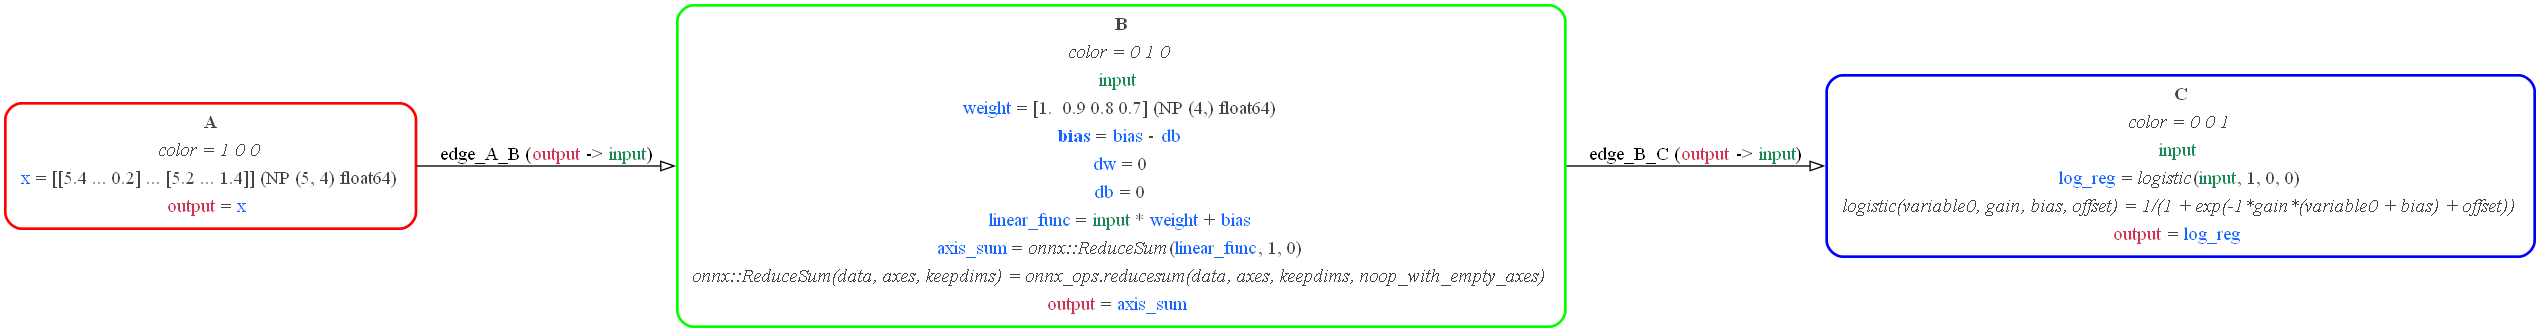

In [8]:
model.to_graph_image(engine="dot", 
               output_format="png", 
               view_on_render=False, 
               level=3, 
               filename_root="ABC", 
               is_horizontal=True)

from IPython.display import Image
Image(filename='ABC.png')

#### Retrieve Input(x) and Create Labels(y)
<a class="anchor" id="x_y"></a>

In [9]:
# retrieving the input matrix
x = node_a.get_parameter('x').value
x

array([[5.4, 3.7, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 3. , 1.4, 0.2],
       [5.2, 2.7, 3.9, 1.4]])

In [10]:
# creatng the labels for each row in the input matrix
y_true = np.array([0, 0, 1, 0, 1])

#### Evaluate the Graph
<a class="anchor" id="eval_graph"></a>

In [11]:
from modeci_mdf.execution_engine import EvaluableGraph

# create an instance of EvaluableGraph on the graph
eg = EvaluableGraph(graph, verbose=False)

# create a time derivation
dt = 1

# create number of runtime
t = 0

# evaluate the graph
eg.evaluate(time_increment=dt)

# retrieve the predicted labels probability
y_pred = eg.enodes['C'].evaluable_outputs['output'].curr_value

# calculate the log-loss
loss = np.sum((y_true * np.log(y_pred)) + ((1-y_true) * (1-np.log(y_pred)))) / -x.shape[0]

print("======= Outputs for all nodes using initial weights and bias =======")
print(f"Runtime_{t}:")
print(f"Output of A: \n{eg.enodes['A'].evaluable_outputs['output'].curr_value}\n")
print(f"Output of B: \n{eg.enodes['B'].evaluable_outputs['output'].curr_value}\n")
print(f"Output of C: \n{eg.enodes['C'].evaluable_outputs['output'].curr_value}")
print("="*70, "\n")

while np.abs(loss) >= 0.2 and t < 10:
    
    dz = y_pred - y_true # derivative of loss wrt linear function
    dw = np.dot(dz, x) / x.shape[0] # derivative of loss wrt to the weights
    db = sum(dz) / x.shape[0] # derivative of loss wrt to bias
    
    # update dw and db parameter with the change
    node_b.get_parameter('dw').value = dw
    node_b.get_parameter('db').value = db
    eg.evaluate(time_increment=dt)
    y_pred = eg.enodes['C'].evaluable_outputs['output'].curr_value
    loss = np.sum((y_true * np.log(y_pred)) + ((1-y_true) * (1-np.log(y_pred)))) / -x.shape[0]
    
    print("======= Outputs for all nodes after updating weights and bias =======")
    print(f"Runtime_{t}:")
    print(f"Output of A: \n{eg.enodes['A'].evaluable_outputs['output'].curr_value}\n")
    print(f"Output of B: \n{eg.enodes['B'].evaluable_outputs['output'].curr_value}\n")
    print(f"Output of C: \n{eg.enodes['C'].evaluable_outputs['output'].curr_value}")
    print("="*70, "\n")
    
    t += dt


Init graph: abc_graph
Evaluating graph: abc_graph, root nodes: ['A'], with array format numpy
======= Outputs for all nodes using initial weights and bias =======
Runtime_0:
Output of A: 
[[5.4 3.7 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.7 2.8 4.1 1.3]
 [4.9 3.  1.4 0.2]
 [5.2 2.7 3.9 1.4]]

Output of B: 
[10.07000065  9.5        12.40999985  8.86000061 11.72999954]

Output of C: 
[0.99995767 0.99992515 0.99999592 0.99985807 0.99999195]

Evaluating graph: abc_graph, root nodes: ['A'], with array format numpy
======= Outputs for all nodes after updating weights and bias =======
Runtime_0:
Output of A: 
[[5.4 3.7 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.7 2.8 4.1 1.3]
 [4.9 3.  1.4 0.2]
 [5.2 2.7 3.9 1.4]]

Output of B: 
[10.07000065  9.5        12.40999985  8.86000061 11.72999954]

Output of C: 
[0.99995767 0.99992515 0.99999592 0.99985807 0.99999195]

Evaluating graph: abc_graph, root nodes: ['A'], with array format numpy
======= Outputs for all nodes after updating weights and bias =======
Runtime_1: